## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [205]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style(style="darkgrid")
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [206]:
# Import dataset
df = pd.read_csv('ab_data.csv')

# Show the 6 first rows
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [207]:
df.shape

(294478, 5)



c. The number of unique users in the dataset.

In [208]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [209]:
df['converted'].mean()
print("{:.0%}".format(df['converted'].mean()))

12%


e. The number of times the `new_page` and `treatment` don't line up.

In [210]:
df2 = df.loc[(df["group"]!="treatment") & (df["landing_page"]=="new_page") ,  ["group","landing_page"]]
df3 = df.loc[(df["group"]=="treatment") & (df["landing_page"]!="new_page") ,  ["group","landing_page"]]
df2+df3

,group,landing_page
22,NaN,NaN
240,NaN,NaN
308,NaN,NaN
327,NaN,NaN
357,NaN,NaN
490,NaN,NaN
685,NaN,NaN
713,NaN,NaN
776,NaN,NaN
846,NaN,NaN


<font color='green'>The number of times the new_page and treatment don't line up is **3,893**.</font>

f. Do any of the rows have missing values?

In [211]:
 df.apply(lambda x: sum(x.isnull()),axis=0) 

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [212]:
df.drop(df.loc[(df["group"]!="treatment") & (df["landing_page"]=="new_page") ,  ["group","landing_page"]].index, inplace=True)
df.drop(df.loc[(df["group"]=="treatment") & (df["landing_page"]!="new_page") ,  ["group","landing_page"]].index, inplace=True)

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [214]:
# save new clean datasets for next section
df.to_csv('ab_data2.csv', index=False)

In [215]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

1928

In [216]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == True].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [217]:
df2 = pd.read_csv('ab_data2.csv')
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [218]:
df2[df2.duplicated('user_id')]

,user_id,timestamp,group,landing_page,converted
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [219]:
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1876,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [220]:
df2.drop(labels=2862, axis=0, inplace=True)

In [221]:
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1876,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [222]:
df2['converted'].mean()
print("{:.2%}".format(df2['converted'].mean()))

11.96%


b. Given that an individual was in the `control` group, what is the probability they converted?

In [223]:
x = df2[df2['group']=='control']['converted'].mean()
print("{:.2%}".format(x))

12.04%


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [224]:
x = df2[df2['group']=='treatment']['converted'].mean()
print("{:.2%}".format(x))

11.88%


d. What is the probability that an individual received the new page?

In [225]:
x = len(df2.query("landing_page == 'new_page'")) / df2.shape[0]
print("{:.2%}".format(x))

50.01%


e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

</br><font color='green'>Based on the given results, there isn't any evidence that one page leads to more conversions.

Overall, we noticed that the probability of an individual converting regardless the page they received (old or new page) is **11.96%**.
More specifically, the probability that an individual, who was in the control group, converted is **12.04%**. As for the individual in the treatment group, the probability they converted is **11.88%**.

Finally, the probability that an individual received the new page is **50.01%**. 

We can conclude that, no, there isn't any evidence as the difference between the two groups is really tiny.</font>


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

</br><font color='green'>
**Null Hypothesis** (**$H_{0}$**): **$p_{old}$** $\ge$ **$p_{new}$** <br>
<br>*==> The performance of the old page is performing better or the results are equal to the new one.*

**Alternative Hypothesis** (**$H_{1}$**): **$p_{old}$** < **$p_{new}$** <br>
<br>*==> The new page performs better.*
</font>

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>


a. What is the **convert rate** for $p_{new}$ under the null? 

In [226]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))


p_new = df2['converted'].mean()
printmd("**P*new***: {:0.4}".format(p_new))

**P*new***: 0.1196

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [227]:
p_old = df2['converted'].mean()
printmd("**P*old***: {:0.4}".format(p_old))

**P*old***: 0.1196

c. What is $n_{new}$?

In [228]:
Nnew = df2.query('group == "treatment"')['user_id'].nunique()
print (Nnew)

145310


d. What is $n_{old}$?

In [229]:
Nold = df2.query('group == "control"')['user_id'].nunique()
print (Nold)

145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [230]:
new_page_converted = np.random.binomial(1, p_new, Nnew)
print(new_page_converted)

[0 0 0 ..., 0 0 1]


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [231]:
old_page_converted = np.random.binomial(1, p_old, Nold)
print(new_page_converted)

[0 0 0 ..., 0 0 1]


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [232]:
p_new-p_old

0.0

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [233]:
p_diffs=[]
new_convert=np.random.binomial(Nnew, p_new, 10000)/Nnew
old_convert=np.random.binomial(Nold, p_old, 10000)/Nold
p_diffs=new_convert-old_convert

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

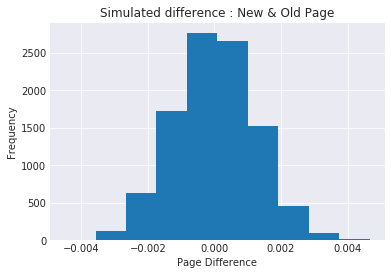

In [234]:
plt.hist(p_diffs)
plt.title('Simulated difference : New & Old Page')
plt.xlabel('Page Difference')
plt.ylabel('Frequency');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [235]:
x1 = df2[df2['group']=='treatment']['converted'].mean()
x2 = df2[df2['group']=='control']['converted'].mean()
 
difference = x1 - x2
proportion = (p_diffs > (difference)).mean()
printmd("**Proportion is**: {:0.2%}".format(proportion))

**Proportion is**: 90.44%

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

</br><font color='green'>We just computed a value named "p_diffs", which is actually called **P value** in scientific studies. This value allows us to make hypothesis and see if there is a difference between any groups.

As we can see above, we get a P value of 91% when our Type I error rate, also called ($\alpha$), is 5%.

P value > $\alpha$ 
In other words, that means that we failed to reject the null hypothesis ($H_{0}$). Since the conversion rate of the new page isn't better than the old one, there is not significant difference between the old and new pages.</font>


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [236]:
import statsmodels.api as sm

convert_old = sum(df2.query("group == 'control'")['converted'])
convert_new = sum(df2.query("group == 'treatment'")['converted'])
n_old = df2.query("group == 'control'").shape[0]
n_new = df2.query("group == 'treatment'").shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [237]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print(z_score, p_value)

1.31092419842 0.905058312759


In [238]:
from scipy.stats import norm

print(norm.cdf(z_score))

print(norm.ppf(1-(0.05)))


0.905058312759
1.64485362695


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

</br><font color='green'>Since the z-score of 1.31092419842 doesn't exceed the critical value of 1.64485362695, we don't reject the null hypothesis that the difference between the two proportions is no different from zero. Since they are not different, the proportion with the higher ratio of success isn't better than the one with the lower ratio.

Spoken plainly, the conversion rate of the old isn't statistically different and better than the CVR of the new one. 

This confirms the findings in part j. and k..</font>


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

</br><font color='green'>
**Logistic regression**

*"This is a regression approach used to predict only two possible outcomes.
This can be predicting whether a particular credit card transaction is fraud or not, whether an individual will click to our website or not, whether an individual will default on a loan or not, or anything else we might like to predict with only two outcomes.*</font>

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [239]:
df['intercept']=1
df[['control', 'treatment']] = pd.get_dummies(df['group'])
df.rename(columns={'treatment':'ab_page'},inplace=True)

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [240]:
import statsmodels.api as sm
logit = sm.Logit(df['converted'],df[['intercept','ab_page']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [241]:
results = logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Wed, 14 Mar 2018   Pseudo R-squ.:               8.085e-06
Time:                        00:16:31   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.312      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

</br><font color='green'>The p-value associated with **ab_page** is 0.19, which is higher than 0.05.
We can notice the p-value of this part is 0.190, which shows a significant difference as the p-value in the part II is 0.905. This can be explained by the fact that we did a one-sided analysis in the second part, while this is a two-sided analysis in this section.

**$H_{0}$**: **$p_{old}$** = **$p_{new}$**

**$H_{1}$**: **$p_{old}$** $\neq$ **$p_{new}$**
</font>

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

</br><font color='green'>It's a good idea to consider other factors to add into the regression model in order *"to avoid over fitting and under fitting. We should include all significant variables. A good approach to ensure this practice is to use a step wise method to estimate the logistic regression*. (source: Analytics Vidhya)

As for the disadvantage: *It requires large sample sizes because maximum likelihood estimates are less powerful at low sample sizes than ordinary least square."* (source: Analytics Vidhya)


> Factors to be considered:

* Loading time
* Duration of the experiment
* Call to action
* Coupon / Discount
* Headline
* Videos
* Mobile friendly
* Ads 
* Wording
</font>

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [242]:
df_countries = pd.read_csv('countries.csv')
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [243]:
df_new = df_countries.set_index('user_id').join(df.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,ab_page
user_id,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,0,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,0,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,1,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,0,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,0,1


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [244]:
df_new['country'].value_counts()
df_new[["CA","US"]] = pd.get_dummies(df_new['country'])[["CA","US"]]
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,ab_page,CA,US
user_id,,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,0,1,0,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,0,1,0,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,1,0,0,1
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,0,1,0,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,0,1,0,1


In [245]:
mod=sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'CA','US']])
results=mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            3
Date:                Wed, 14 Mar 2018   Pseudo R-squ.:               2.324e-05
Time:                        00:18:09   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1758
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9794      0.013   -155.414      0.000      -2.004      -1.954
ab_page       -0.0150      0.011     -1.308      0.191      -0.037       0.007
CA            -0.0506      0.028     -1.784      0.074      -0.106       0.005
US            -0.0099      0.013     -0.744      0.457      -0.036       0.016
==============================================================================
"""

</br><font color='green'>It appears that Canadian are more likely to convert as it shows a p-value of 0.074. However, it's not critical enough to state that the company should switch to the new page because the Type Error I is still 0.05 and we don't notice any impact driven either from the different pages or countries.

To conclude, the analysis across the sections (II & III) shows that the results are quite consistent and not significant enough to set a new page.</font>

**Resources**
* https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-learn-data-science-python-scratch-2/
* https://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas
* https://www.w3resource.com/python-exercises/string/python-data-type-string-exercise-36.php
* https://math.meta.stackexchange.com/questions/21841/how-to-type-greater-than-or-equal-to-symbols
* https://www.analyticsvidhya.com/blog/2015/08/comprehensive-guide-regression/
* https://www.youtube.com/watch?v=7FTp9JJ5DfE&feature=youtu.be
